# Get the data

In [1113]:
import numpy as np 
import pandas as pd
%matplotlib inline 
random_state=0

In [1114]:
# The data is provided by the Johns Hopkins University
# https://github.com/CSSEGISandData/COVID-19
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [1115]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673


In [1116]:
rawData = [i for i in range(df.shape[1] - 4)]
for i in range(4, df.shape[1]):
    rawData[i-4] = sum(df.iloc[:, i])
rawData

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156097,
 167449,
 181530,
 197145]

In [1117]:
import datetime
numberOfDaysToForcast = 5
numberOfAvailableDays = len(df.columns) - 4
numberOfDays = numberOfAvailableDays + numberOfDaysToForcast
day1 = datetime.datetime.strptime('1/22/2020', '%m/%d/%Y')
availableDateRange = [day1 + datetime.timedelta(days=x) for x in range(numberOfAvailableDays)]
futureDateRange = [availableDateRange[-1]  + datetime.timedelta(days=x) for x in range(1, numberOfDaysToForcast + 1)]
fullDateRange = [day1 + datetime.timedelta(days=x) for x in range(numberOfDays)]
futureDateRange

[datetime.datetime(2020, 3, 18, 0, 0),
 datetime.datetime(2020, 3, 19, 0, 0),
 datetime.datetime(2020, 3, 20, 0, 0),
 datetime.datetime(2020, 3, 21, 0, 0),
 datetime.datetime(2020, 3, 22, 0, 0)]

In [1118]:
availableDateRange[-1]

datetime.datetime(2020, 3, 17, 0, 0)

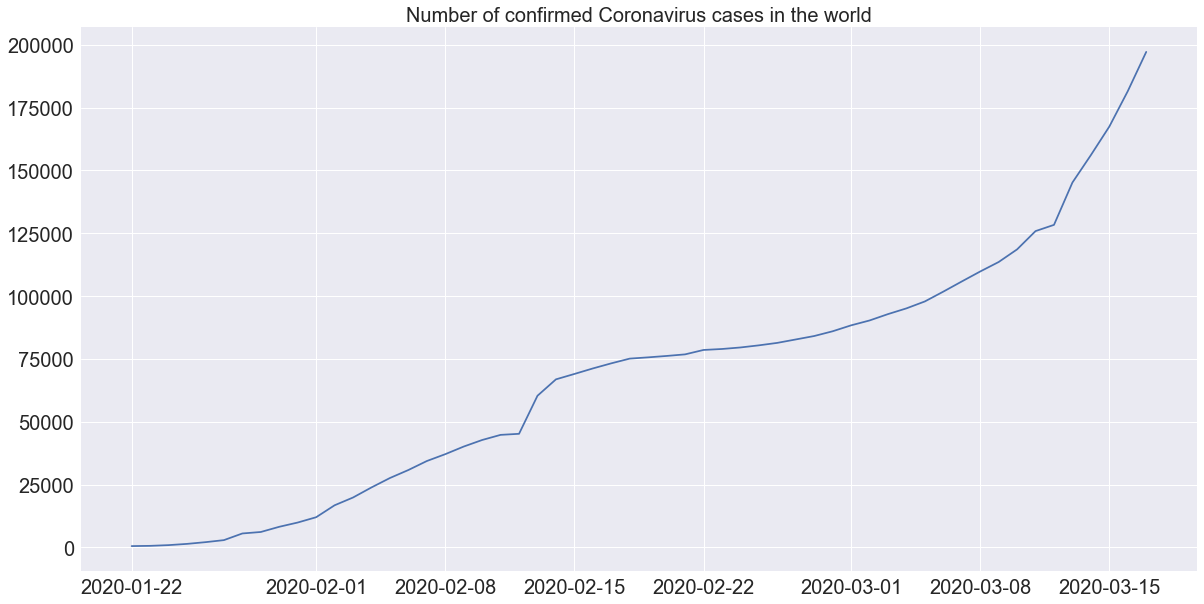

In [1119]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 10))
plt.title('Number of confirmed Coronavirus cases in the world', size=20)
plt.plot(availableDateRange, rawData)
plt.show()

# Prepare the Dataset

In [1120]:
numberOfPreviousData = 4

In [1121]:
# This is how I form my dataset from the rawData variable

# rawData = [1 2 3 4 5]:
# x=[1 2] y=3
# x=[2 3] y=4
# x=[3 4] y=5
# number of training data = 5 - 2

# rawData = [1 2 3 4 5 6]:
# x=[1 2] y=3
# x=[2 3] y=4
# x=[3 4] y=5
# x=[4 5] y=6
# number of training data = 6 - 2

In [1122]:
numberOfTrainingTestRecords = len(rawData) - numberOfPreviousData
numberOfTrainingTestRecords

52

In [1123]:
# Build the dataset for training and testing
X = np.zeros((numberOfTrainingTestRecords, numberOfPreviousData))
y = np.zeros(numberOfTrainingTestRecords)
for i in range(numberOfTrainingTestRecords):
    for j in range(numberOfPreviousData):
        X[i, j] = rawData[i + j]
    y[i] = rawData[i + numberOfPreviousData]

In [1124]:
# I don't want any shared data between training set and test set (X_train, X_test)
# I'm not selecting the few data rows between train and test data
# to make sure they have nothin in common
testFraction = 0.1
numberOfUsableData = numberOfTrainingTestRecords - numberOfPreviousData + 2
numberOfTestData = int(np.ceil(testFraction * numberOfUsableData))
numberOfTrainingData = numberOfUsableData - numberOfTestData
X_train = X[0: numberOfTrainingData, :]
y_train = y[0:numberOfTrainingData]
X_test = X[-numberOfTestData:, :]
y_test = y[-numberOfTestData:]

In [1125]:
# Normalize
maxValue = max(rawData)
X_train = X_train /maxValue
y_train = y_train /maxValue
X_test = X_test /maxValue
y_test = y_test /maxValue

# Select Model

In [1126]:
# Select a good machine learning algorithm for this dataset By picking the one that fits the data well and has the lowest error

## SVM

In [1127]:
from sklearn.svm import SVR
svr = SVR()

In [1128]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'C':[1000, 100, 10, 1],
'epsilon': [0.1, 0.01, 0.05, 0.001]}

In [1129]:
clf = GridSearchCV(svr, param_grid=parameters, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

{'C': 1000, 'epsilon': 0.001}

In [1130]:
svr = SVR(C=clf.best_params_['C'], epsilon=clf.best_params_['epsilon'])
svr.fit(X_train,y_train)
Y_pred = svr.predict(X_test)

C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1131]:
from sklearn.metrics import mean_absolute_error
svmError = round(mean_absolute_error(Y_pred, y_test),4,)
print('MAE error: ', svmError)

MAE error:  0.0329


In [1132]:
y_train_results = svr.predict(X_train)

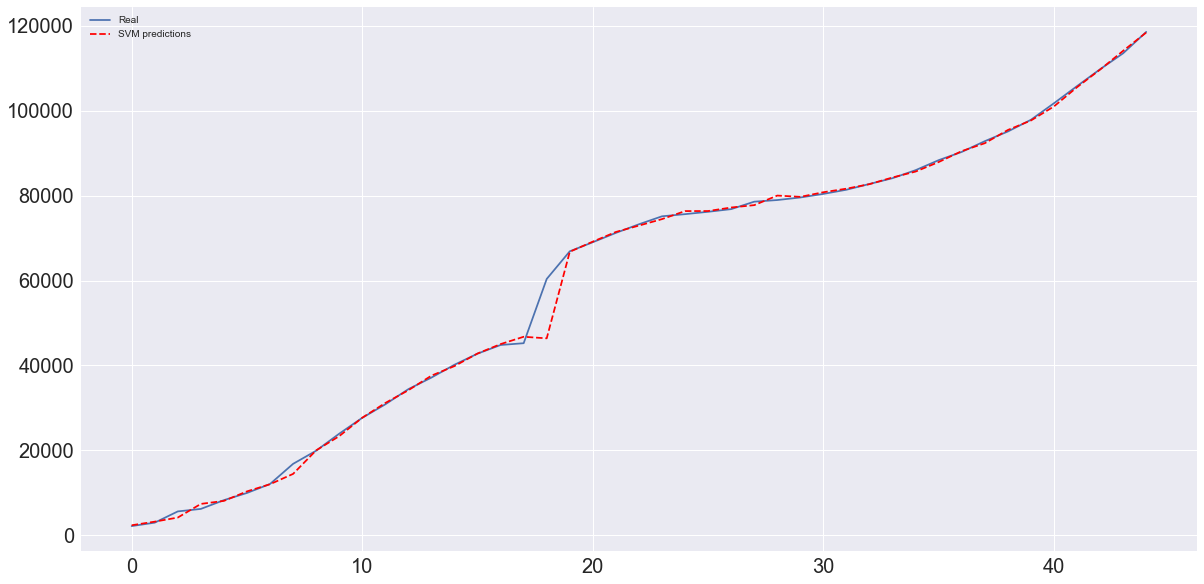

In [1133]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(y_train)), y_train * maxValue)
plt.plot(range(len(y_train)), y_train_results * maxValue, linestyle='dashed', color='red')
plt.legend(['Real', 'SVM predictions'])
plt.show()

In [1134]:
y_train_results

array([0.0117504 , 0.0160519 , 0.02094804, 0.03726927, 0.04086401,
       0.05222326, 0.06080159, 0.07312228, 0.10127684, 0.11824882,
       0.1402859 , 0.15793334, 0.17316558, 0.19058859, 0.20205476,
       0.21706661, 0.22832814, 0.23708377, 0.23520882, 0.33867927,
       0.35082781, 0.36238614, 0.37000251, 0.3777433 , 0.38734482,
       0.38740232, 0.39161211, 0.3944412 , 0.40589817, 0.40435593,
       0.40988378, 0.41414896, 0.41954266, 0.42753864, 0.43460066,
       0.44597625, 0.45903312, 0.4684911 , 0.48429499, 0.49563383,
       0.51249213, 0.53545855, 0.5564861 , 0.57896248, 0.60079041])

## Random Forest

In [1135]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
parameters = {
 'n_estimators': [10, 50, 100, 150, 200, 400, 600]}
clf = GridSearchCV(rf, param_grid=parameters, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

{'n_estimators': 10}

In [1136]:
rf = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'])
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)
rfError = round(mean_absolute_error(Y_pred, y_test),4,)
print('MAE error: ', rfError)

MAE error:  0.2762


In [1137]:
y_train_results = rf.predict(X_train)

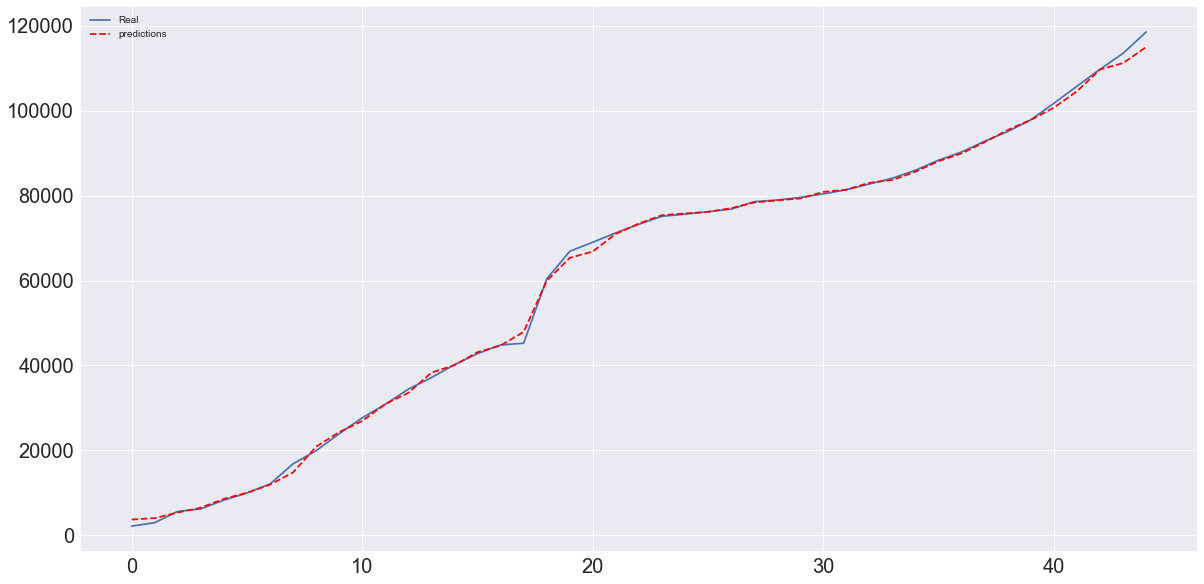

In [1138]:
plt.figure(figsize=(20, 10))
plt.plot(range(len(y_train)), y_train * maxValue)
plt.plot(range(len(y_train)), y_train_results * maxValue, linestyle='dashed', color='red')
plt.legend(['Real', 'predictions'])
plt.show()

## Neural Network

In [1139]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
parameters = {
'hidden_layer_sizes': [(5), (10), (20), 
                        (5, 5), (10, 10), (20, 20), (30, 30),
                        (5, 5, 5), (10, 10, 10), (20, 20, 20)],
'max_iter': [100, 500, 1000, 2000]
}
clf = GridSearchCV(mlp, param_grid=parameters, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

{'hidden_layer_sizes': (10, 10, 10), 'max_iter': 1000}

In [1140]:
mlp = MLPRegressor(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], max_iter= clf.best_params_['max_iter'])
mlp.fit(X_train, y_train)
Y_pred = mlp.predict(X_test)
mlpError = round(mean_absolute_error(Y_pred, y_test),4,)
print('MAE error: ', mlpError)

MAE error:  0.4673


In [1141]:
y_train_results = mlp.predict(X_train)

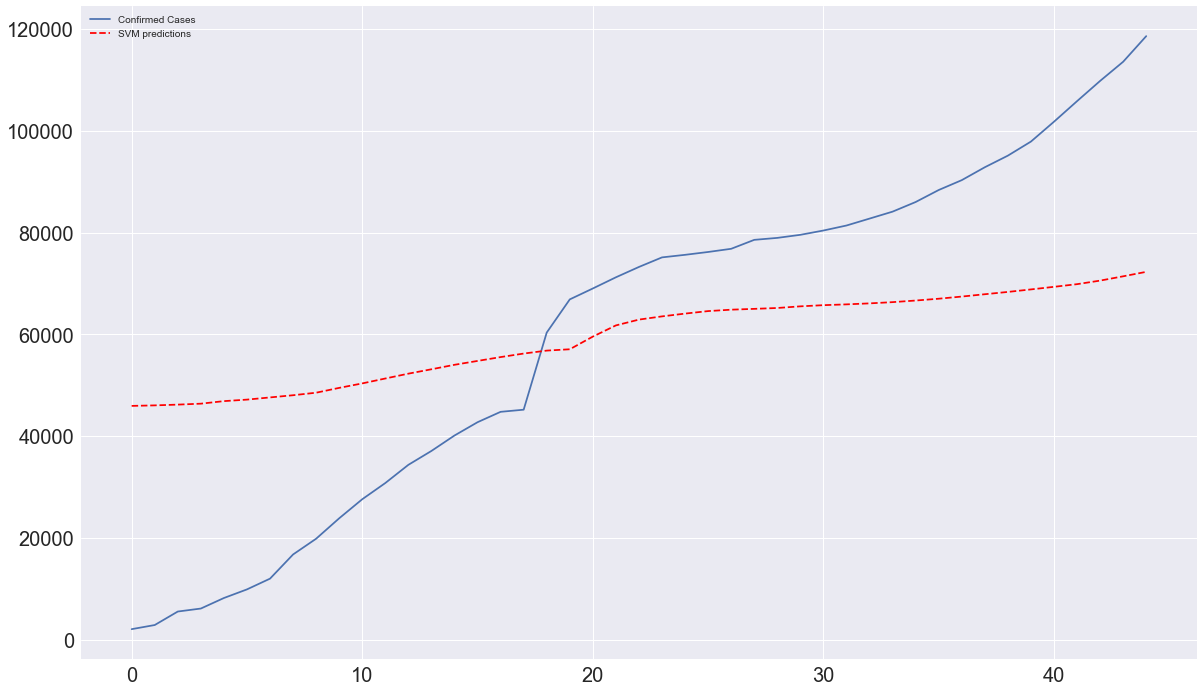

In [1142]:
plt.figure(figsize=(20, 12))
plt.plot(range(len(y_train)), y_train * maxValue)
plt.plot(range(len(y_train)), y_train_results * maxValue, linestyle='dashed', color='red')
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.show()

## LSTM

In [1143]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [1144]:
X_train_LSTM = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train_LSTM.shape, y_train.shape)

(45, 4, 1) (45,)


In [1145]:
regressor = Sequential()

regressor.add(LSTM(units = 7, return_sequences = False, input_shape = (X_train_LSTM.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train_LSTM, y_train, epochs = 100, batch_size = 8)

Epoch 1/100
45/45 [==============================] - 0s 7ms/step - loss: 0.1203
Epoch 2/100
45/45 [==============================] - 0s 399us/step - loss: 0.0994
Epoch 3/100
45/45 [==============================] - 0s 399us/step - loss: 0.0924
Epoch 4/100
45/45 [==============================] - 0s 421us/step - loss: 0.0808
Epoch 5/100
45/45 [==============================] - 0s 377us/step - loss: 0.0561
Epoch 6/100
45/45 [==============================] - 0s 443us/step - loss: 0.0474
Epoch 7/100
45/45 [==============================] - 0s 443us/step - loss: 0.0429
Epoch 8/100
45/45 [==============================] - 0s 355us/step - loss: 0.0354
Epoch 9/100
45/45 [==============================] - 0s 399us/step - loss: 0.0365
Epoch 10/100
45/45 [==============================] - 0s 377us/step - loss: 0.0199
Epoch 11/100
45/45 [==============================] - 0s 355us/step - loss: 0.0284
Epoch 12/100
45/45 [==============================] - 0s 377us/step - loss: 0.0218
Epoch 13/100
45

45/45 [==============================] - 0s 355us/step - loss: 0.0049
Epoch 100/100
45/45 [==============================] - 0s 332us/step - loss: 0.0065


In [1146]:
X_test_LSTM = np.array(X_test)
X_test_LSTM = np.reshape(X_test_LSTM, (X_test_LSTM.shape[0], X_test_LSTM.shape[1], 1))
Y_pred = regressor.predict(X_test_LSTM)
Y_pred = Y_pred[0:len(Y_pred),0]
lstmError = round(mean_absolute_error(Y_pred, y_test),4,)
print('MAE error: ', lstmError)

MAE error:  0.1586


In [1147]:
y_train_results = regressor.predict(X_train_LSTM)

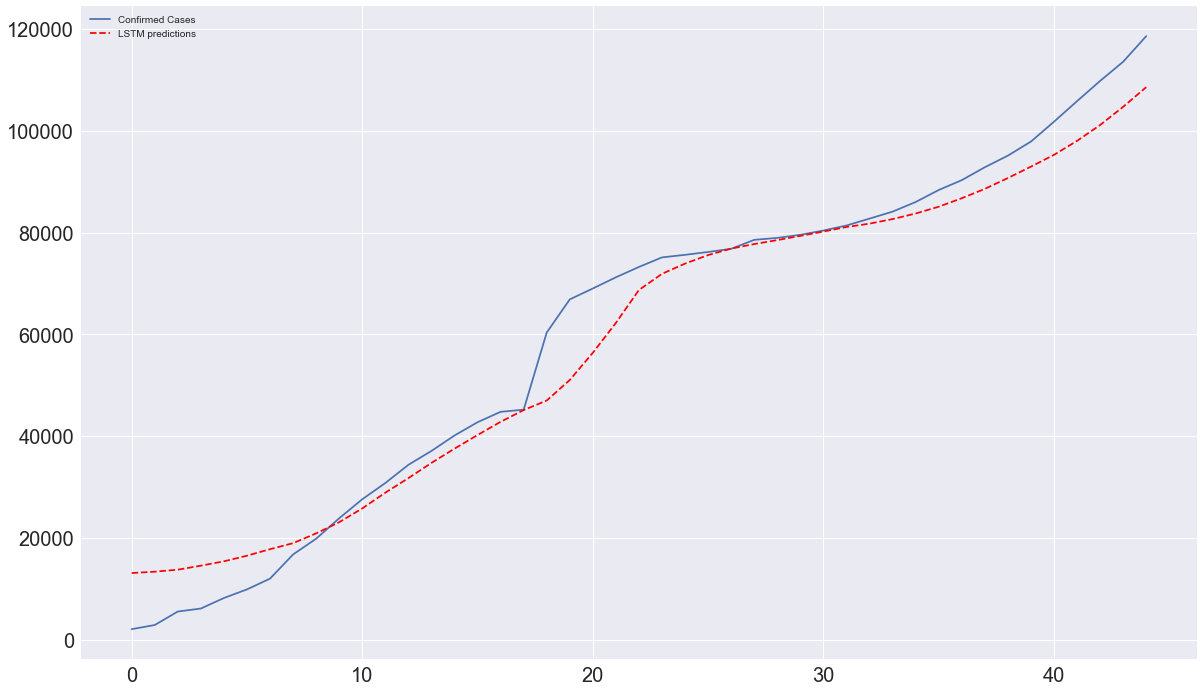

In [1148]:
plt.figure(figsize=(20, 12))
plt.plot(range(len(y_train)), y_train * maxValue)
plt.plot(range(len(y_train)), y_train_results * maxValue, linestyle='dashed', color='red')
plt.legend(['Confirmed Cases', 'LSTM predictions'])
plt.show()

# Forcast using all available data 

In [1149]:
# train the SVM model on all available data and then make predictions for the upcoming days

In [1150]:
X_train = X
y_train = y

In [1151]:
# Normalize
X_train = X_train /maxValue
y_train = y_train /maxValue

In [1152]:
parameters = {
    'C':[1000, 100, 10, 1],
'epsilon': [0.1, 0.01, 0.05, 0.001]}

In [1153]:
clf = GridSearchCV(svr, param_grid=parameters, cv=5)
clf.fit(X_train, y_train)
clf.best_params_

C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

{'C': 1000, 'epsilon': 0.001}

In [1154]:
svr = SVR(C=clf.best_params_['C'], epsilon=clf.best_params_['epsilon'])
svr.fit(X_train,y_train)

C:\Users\Meysam\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.001,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [1155]:
forcasts = np.zeros(numberOfDaysToForcast)
movingX = rawData[-numberOfPreviousData:]
movingX = movingX
movingX = np.array(movingX) / maxValue
movingX

array([0.79178777, 0.84936975, 0.92079434, 1.        ])

In [1156]:
for i in range(len(forcasts)):
    forcasts[i] = svr.predict(movingX.reshape(1, numberOfPreviousData))
    for j in range(movingX.shape[0] - 1):
        movingX[j] = movingX[j+1]
    movingX[-1] = forcasts[i]
    
print(forcasts)

[1.07903035 1.14987792 1.2046584  1.23766939 1.25035381]


In [1157]:
forcasts = list(forcasts * maxValue)
forcasts = [int(round(i, 0)) for i in forcasts]
forcasts

[212725, 226693, 237492, 244000, 246501]

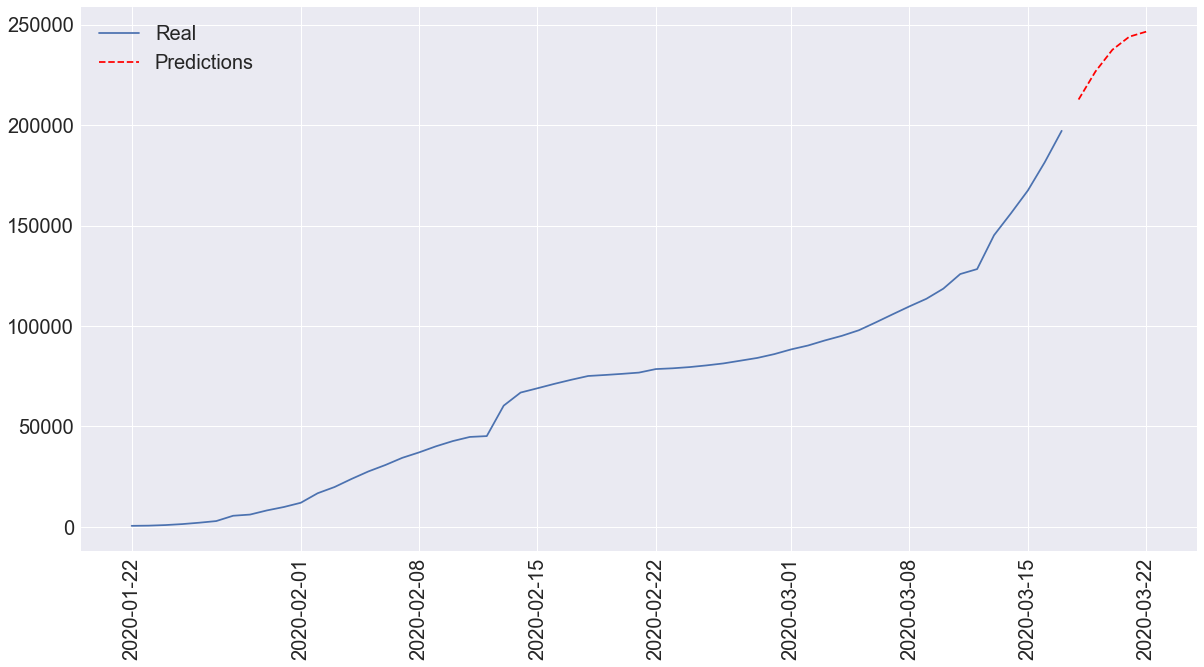

In [1158]:
plt.figure(figsize=(20, 10))
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
plt.plot(availableDateRange, rawData)
plt.plot(futureDateRange, forcasts, linestyle='dashed', color='red')
plt.legend(['Real', 'Predictions'], prop={'size': 20})
plt.xticks( rotation=90)
plt.show()

In [1159]:
averageError = int(round(svmError * maxValue, 0))
print('Number of confirmed cases:')
for i, day in enumerate(futureDateRange):
    print(day.date(), ':', forcasts[i])
print('Expecting an average error of', averageError, 'people')

Number of confirmed cases:
2020-03-18 : 212725
2020-03-19 : 226693
2020-03-20 : 237492
2020-03-21 : 244000
2020-03-22 : 246501
Expecting an average error of 6486 people
